# **Assignment 2 - Statistical Treatment for NYC Property Sales**

Name: Sarah Aristawidya

Class: PYTN-KS19

# **Project Overview**

Using what you’ve learned; download the NYC Property Sales Dataset from Kaggle. This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

* BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
 * BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
* BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you’re able to make decisions using data in a scientific manner. Examples of questions can be:
1. Is there a difference in unit sold between property built in 1900-2000 and 2001 so on?
2. Is there a difference in unit sold based on building category?
3. What can you discover about New York City real estate by looking at a year's worth of raw transaction records? Can you spot trends in the market?

**Link Dataset:** https://www.kaggle.com/datasets/new-york-city/nyc-property-sales

# Import the Library Required

In [1]:
import pandas as pd
import numpy as np
import math
import statistics
import scipy.stats
from scipy import stats
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.diagnostic import lilliefors
from statistics import NormalDist
from scipy.stats import gaussian_kde
import plotly.express as px
import statsmodels.api as sm
import warnings
from scipy.stats import shapiro

# **Data**
Load Data: Reading a CSV file containing New York City rolling sales into a DataFrame using the pandas library.
<hr>

In [2]:
df = pd.read_csv("nyc-rolling-sales.csv")

# Show top 5 data 
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [3]:
# Show how many rows and columns in dataset
df.shape

(84548, 22)

# Data Cleaning

In [4]:
# Delete `Unnamed`
df.drop(['Unnamed: 0'], axis=1, inplace=True)

# Show the latest 5 rows of the DataFrame
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [5]:
# View data type information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   EASE-MENT                       84548 non-null  object
 7   BUILDING CLASS AT PRESENT       84548 non-null  object
 8   ADDRESS                         84548 non-null  object
 9   APARTMENT NUMBER                84548 non-null  object
 10  ZIP CODE                        84548 non-null  int64 
 11  RESIDENTIAL UNITS               84548 non-null  int64 
 12  COMMERCIAL UNITS                84548 non-null

## Convert Columns

1. **int64:** This data type is used to store integer values in a 64-bit format.
2. **object:** This data type is used to store objects or data types that do not fall under numeric or date and time data types.
3. **category:** This data type is a special type used to store categorical or factor data.
4. **float64:** This data type is used to store decimal numbers in a 64-bit format.
5. **datetime64[ns]:** This data type is used to store date and time data with precision up to nanoseconds (10^-9 seconds). It is a useful data type for date and time-related data, such as transaction dates or observation times.

In [6]:
# Convert columns to numeric data type
numeric = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET" , "GROSS SQUARE FEET","SALE PRICE"]

for col in numeric: 
    df[col] = pd.to_numeric(df[col], errors='coerce') # 'coerce' is used to convert invalid values

In [7]:
# Convert columns to category data type
categorical = ['BOROUGH','NEIGHBORHOOD','BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT','ZIP CODE', 'YEAR BUILT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']

for col in categorical: 
    df[col] = df[col].astype("category")

In [8]:
# Convert columns to datetime data type
df["SALE DATE"] = pd.to_datetime(df["SALE DATE"])

In [9]:
# Convert numeric codes in the "borough" column into area names
renaming_borough = {1: 'Manhattan',
                    2: 'Bronx',
                    3: 'Brooklyn',
                    4: 'Queens',
                    5: 'Staten Island'}
df['BOROUGH'] = df['BOROUGH'].replace(renaming_borough)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


In [10]:
# View data type information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   EASE-MENT                       84548 non-null  object        
 7   BUILDING CLASS AT PRESENT       84548 non-null  category      
 8   ADDRESS                         84548 non-null  object        
 9   APARTMENT NUMBER                84548 non-null  object        
 10  ZIP CODE                        84548 non-null  category      
 11  RE

Here is a brief explanation for each column:
1. **BOROUGH** is the administrative area in New York City where the property is located.
2. **NEIGHBORHOOD** is the name of the neighborhood where the property is situated.
3. **BUILDING CLASS CATEGORY** is the category describing the type of building or property.
4. **TAX CLASS AT PRESENT** is the tax category applicable to the property at present.
5. **BLOCK** is the block number indicating the property's location within the borough.
6. **LOT** is the lot number indicating the property's location within the block.
7. **EASE-MENT** is a column that may not have relevant information as it has constant values.
8. **BUILDING CLASS AT PRESENT** is the category describing the type of building or property at present.
9. **ADDRESS** is the complete address of the property.
10. **APARTMENT NUMBER** is the apartment or unit number if the property is an apartment.
11. **ZIP CODE** is the postal code associated with the property's location.
12. **RESIDENTIAL UNITS** is the number of residential units in the property.
13. **COMMERCIAL UNITS** is the number of commercial units in the property.
14. **TOTAL UNITS** is the total number of units (residential and commercial) in the property.
15. **LAND SQUARE FEET** is the land area (in square feet) owned by the property.
16. **GROSS SQUARE FEET** is the total building area (in square feet) on the property.
17. **YEAR BUILT** is the year when the building or property was constructed.
18. **TAX CLASS AT TIME OF SALE** is the tax category applicable to the property at the time of sale.
19. **BUILDING CLASS AT TIME OF SALE** is the category describing the type of building or property at the time of sale.
20. **SALE PRICE** is the sale price of the property.
21. **SALE DATE** is the date when the property was sold.

In [11]:
# Replace blank spaces with NaN
df.replace(' ',np.nan, inplace=True)

# Check the number of missing values in the dataset
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  65496
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [12]:
# Display the percentage of missing values
df.isna().sum() /len(df) *100

BOROUGH                             0.000000
NEIGHBORHOOD                        0.000000
BUILDING CLASS CATEGORY             0.000000
TAX CLASS AT PRESENT                0.872877
BLOCK                               0.000000
LOT                                 0.000000
EASE-MENT                         100.000000
BUILDING CLASS AT PRESENT           0.872877
ADDRESS                             0.000000
APARTMENT NUMBER                   77.466055
ZIP CODE                            0.000000
RESIDENTIAL UNITS                   0.000000
COMMERCIAL UNITS                    0.000000
TOTAL UNITS                         0.000000
LAND SQUARE FEET                   31.049818
GROSS SQUARE FEET                  32.658372
YEAR BUILT                          0.000000
TAX CLASS AT TIME OF SALE           0.000000
BUILDING CLASS AT TIME OF SALE      0.000000
SALE PRICE                         17.222170
SALE DATE                           0.000000
dtype: float64

## Replace Missing Value
Address missing or unavailable values in your dataset.

1. **EASE-MENT (84548 missing values):**
The "EASE-MENT" column has a very large number of missing values, indicating that it may not provide valuable information for analysis. Therefore, it is considered to be removed to simplify the dataset.

In [13]:
# Dropping columns
df.drop('EASE-MENT', axis=1, inplace=True)

2. **TAX CLASS AT PRESENT (738 missing values):**
The "TAX CLASS AT PRESENT" column contains categorical data, so the `mode` is an appropriate handling for dealing with categorical data with missing values.

In [14]:
# Filling missing values with mode
df['TAX CLASS AT PRESENT'].fillna(df['TAX CLASS AT PRESENT'].mode()[0], inplace=True)

3. **BUILDING CLASS AT PRESENT (738 missing values):**
The "BUILDING CLASS AT PRESENT" column contains categorical data, so the `mode` is an appropriate handling for dealing with categorical data with missing values.

In [15]:
# Filling missing values with mode
df['BUILDING CLASS AT PRESENT'].fillna(df['BUILDING CLASS AT PRESENT'].mode()[0], inplace=True)

4. **APARTMENT NUMBER (65496 missing values):**
The "APARTMENT NUMBER" column can actually be used for analysis; however, it might be better to fill in the missing values with a special label to preserve its significance. However, the use of this column is optional if it is not intended for future analysis.

In [16]:
# Dropping columns
df.drop('APARTMENT NUMBER', axis=1, inplace=True)

5. **LAND SQUARE FEET (26252 missing values):**
The "LAND SQUARE FEET" column contains numeric data, so `mean or median` is an appropriate approach to handling numeric data with missing values. Using the mean can help preserve the overall distribution of the data, while using the median is a more robust approach and less sensitive to outliers.

In [17]:
# Filling missing values with mean
df['LAND SQUARE FEET'].fillna(df['LAND SQUARE FEET'].mean(), inplace=True)

6. **GROSS SQUARE FEET (27612 missing values):**
The "GROSS SQUARE FEET" column contains numeric data, so `mean or median` is an appropriate approach to handling numeric data with missing values. Using the mean can help preserve the overall distribution of the data, while using the median is a more robust approach and less sensitive to outliers.

In [18]:
# Filling missing values with mean
df['GROSS SQUARE FEET'].fillna(df['GROSS SQUARE FEET'].mean(), inplace=True)

7. **SALE PRICE (14561 missing values):**
The "SALE PRICE" column represents the sale price of the property. For numeric data like this, missing values can be handled with the mean, median, or zero to preserve the data distribution. The choice between mean and median depends on the data distribution and sensitivity to outliers. Considering the following:
* If replacing missing values with zero, both the mean and median will significantly decrease. The resulting data will indicate that most property prices are zero, which *may not reflect reality*.
* If replacing missing values with the `median`, the mean and median will be closer to the actual values. This will affect the results of analyses involving descriptive statistics, providing a more accurate representation of the central tendency.
* If replacing missing values with the mode, all properties with missing prices will have the same value. This can *reduce variation in the data and not reflect diversity*.

In [19]:
# Filling missing values with median
df['SALE PRICE'].fillna(df['SALE PRICE'].median(), inplace=True)

In [20]:
# add a new "YEAR" column to the DataFrame, extracting the year from the "SALE DATE" column
df["YEAR"] = [i.year for i in df["SALE DATE"]]

In [21]:
# Take sale price that is greater than 0
df = df[df["SALE PRICE"] != 0]

In [22]:
df.loc[:, "BUILDING CLASS AT PRESENT"] = df["BUILDING CLASS AT PRESENT"].str[0]

In [23]:
# Check the number of missing values in the dataset
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
YEAR                              0
dtype: int64

<Axes: xlabel='SALE PRICE'>

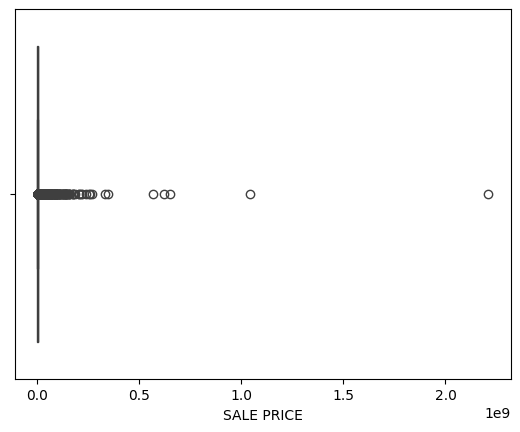

In [24]:
sns.boxplot(data=df,x="SALE PRICE")

In the image above, it can be seen that there are many outliers. Therefore, we will remove the outliers using the IQR (Interquartile Range) method.

In [25]:
# IQR
Q1 = df['SALE PRICE'].describe().loc["25%"]
Q3 = df['SALE PRICE'].describe().loc["75%"]
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

new_df = df[(df["SALE PRICE"] >= lower) & (df["SALE PRICE"] <= upper)]

<Axes: xlabel='SALE PRICE'>

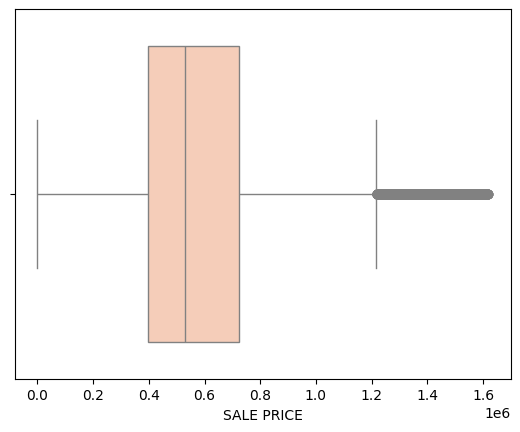

In [26]:
sns.boxplot(data=new_df, x="SALE PRICE", color='#FFCAAF')

In [27]:
n= 1
limit = 2

while n <= limit:
    Q1 = new_df["SALE PRICE"].describe().loc["25%"]
    Q3 = new_df["SALE PRICE"].describe().loc["75%"]
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    new_df = new_df[(new_df["SALE PRICE"] >= lower) & (new_df["SALE PRICE"] <= upper)]
    
    n += 1

<Axes: xlabel='SALE PRICE'>

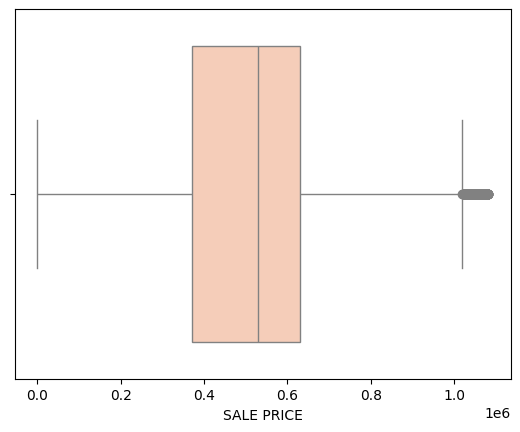

In [28]:
sns.boxplot(data=new_df, x="SALE PRICE", color='#FFCAAF')

# **Measures of Central Tendency**
<hr>

In [29]:
nyc = new_df.groupby(["BOROUGH", "BUILDING CLASS AT PRESENT", "YEAR"],observed=False).agg({
    "SALE PRICE": ["mean", "median", statistics.mode, np.ptp, "var", "std"]
})
nyc = nyc.reset_index()
nyc.columns = nyc.columns.droplevel(-1)
nyc.columns = ['BOROUGH','BUILDING CLASS AT PRESENT','YEAR','MEAN','MEDIAN','MODE','RANGE','VARIANCE','STANDARD DEVIATION']
nyc = nyc.dropna()
nyc

,BOROUGH,BUILDING CLASS AT PRESENT,YEAR,MEAN,MEDIAN,MODE,RANGE,VARIANCE,STANDARD DEVIATION
0,Manhattan,A,2016,557801.750000,530000.0,530000.0,692758.0,1.862481e+10,136472.744737
1,Manhattan,A,2017,445076.969697,530000.0,530000.0,634990.0,3.796236e+10,194839.313193
2,Manhattan,B,2016,528235.294118,530000.0,530000.0,30000.0,5.294118e+07,7276.068751
3,Manhattan,B,2017,535250.680000,530000.0,530000.0,939990.0,4.172519e+10,204267.447429
4,Manhattan,C,2016,486932.002667,530000.0,530000.0,1079999.0,4.031097e+10,200775.910003
...,...,...,...,...,...,...,...,...,...
242,Staten Island,V,2016,432407.346535,530000.0,530000.0,989999.0,3.993791e+10,199844.703566
243,Staten Island,V,2017,456639.265781,530000.0,530000.0,1066287.0,3.227854e+10,179662.299357
244,Staten Island,W,2016,448461.692308,530000.0,530000.0,529999.0,3.961395e+10,199032.542759
248,Staten Island,Z,2016,355000.000000,355000.0,180000.0,350000.0,6.125000e+10,247487.373415


## Mean
Mean is the average value of a set of data or a group of data.

**Average selling prices per unit in New York City per Borough**

In [30]:
# Group by 'BOROUGH', then calculate the mean of 'SALE PRICE'
mean_sale_price = new_df.groupby(['BOROUGH'], observed=False)['SALE PRICE'].mean().reset_index()

# Print the result
print(mean_sale_price)

         BOROUGH     SALE PRICE
0      Manhattan  589250.154805
1          Bronx  374417.765099
2       Brooklyn  553441.138851
3         Queens  497724.530375
4  Staten Island  480323.942501


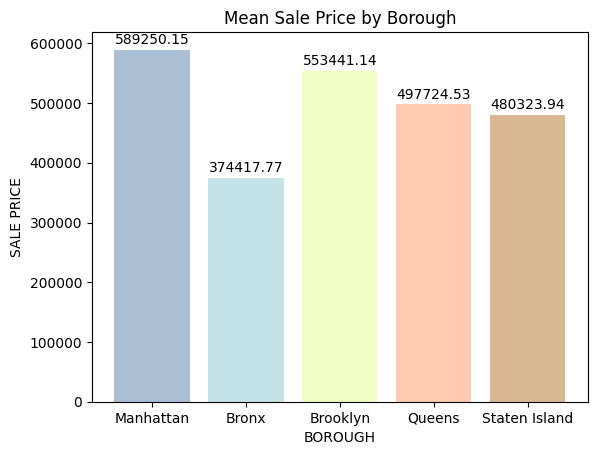

In [31]:
import matplotlib.pyplot as plt

colors = ['#A7BED3', '#C6E2E9', '#F1FFC4', '#FFCAAF', '#DAB894']

# Plot bar chart with different colors
bars = plt.bar(mean_sale_price['BOROUGH'], mean_sale_price['SALE PRICE'], color=colors)
plt.xlabel('BOROUGH')
plt.ylabel('SALE PRICE')
plt.title('Mean Sale Price by Borough')

# Add numbers at the top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5000, round(yval, 2), ha='center', va='bottom', color='black', fontweight='normal', fontsize=10)

plt.show()

**Conclusion:** The SALE PRICE data is grouped by borough, and the average selling price is calculated for each borough. The result is a table displaying each borough along with its average selling price and a bar chart visualizing the average selling price for each borough. Based on the above graph, it can be concluded that the `borough with the highest selling price is Manhattan with an average price of 589,250,154.805`.

## Median
Median is a statistical term that refers to the middle value in a set of data when the data points are arranged in order. 

**The median value of building size in New York City for each borough**

In [32]:
# Group by 'BOROUGH', then calculate the median of 'GROSS SQUARE FEET'
median_sale_price = new_df.groupby(['BOROUGH'], observed=False)['GROSS SQUARE FEET'].median().reset_index()


# Print the result
print(median_sale_price)

         BOROUGH  GROSS SQUARE FEET
0      Manhattan        4045.707479
1          Bronx        1584.000000
2       Brooklyn         680.000000
3         Queens        2332.000000
4  Staten Island        1794.000000


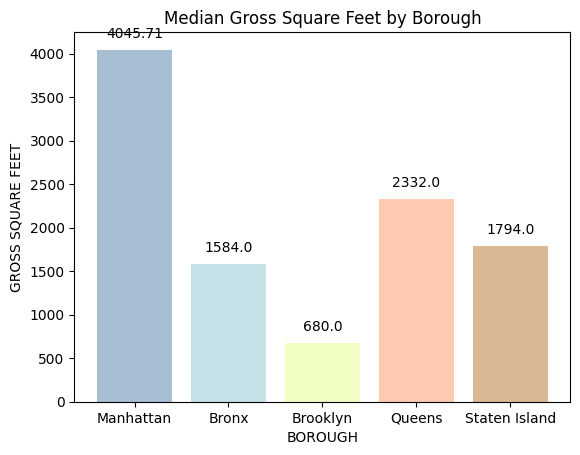

In [33]:
import matplotlib.pyplot as plt

# Plot bar chart with different colors
bars = plt.bar(median_sale_price['BOROUGH'], median_sale_price['GROSS SQUARE FEET'], color=colors)
plt.xlabel('BOROUGH')
plt.ylabel('GROSS SQUARE FEET')
plt.title('Median Gross Square Feet by Borough')

# Add numbers at the top of each bar with adjusted position and fontweight
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 100, round(yval, 2), ha='center', va='bottom', color='black', fontweight='normal', fontsize=10)

plt.show()

**Conclusion:** The building size data (GROSS SQUARE FEET) is grouped by borough, and the median building size is calculated for each borough. The result is presented in a table showing each borough along with its median building size. Additionally, this syntax generates a bar chart visualizing the median building size for each borough. Based on the graph, it can be concluded that the `borough with the highest median building size is Manhattan with a value of 4,045,707.479`.

## Mode
Mode is a statistical term that represents the value or values that appear most frequently in a dataset.

**Determining the most popular building class category**

In [34]:
# Calculate the mode of BUILDING CLASS CATEGORY
mode_building_class = new_df['BUILDING CLASS CATEGORY'].mode().iloc[0]

# Calculate the frequency of each BUILDING CLASS CATEGORY
building_class_counts = new_df['BUILDING CLASS CATEGORY'].value_counts()

# Create a DataFrame from the frequency calculations
building_class_counts_df = building_class_counts.reset_index()
building_class_counts_df.columns = ['BUILDING CLASS CATEGORY', 'Counts']

print(building_class_counts_df)

                         BUILDING CLASS CATEGORY  Counts
0    01 ONE FAMILY DWELLINGS                       15736
1    02 TWO FAMILY DWELLINGS                       11249
2    10 COOPS - ELEVATOR APARTMENTS                10607
3    13 CONDOS - ELEVATOR APARTMENTS                7277
4    09 COOPS - WALKUP APARTMENTS                   2485
5    03 THREE FAMILY DWELLINGS                      2349
6    04 TAX CLASS 1 CONDOS                          1384
7    07 RENTALS - WALKUP APARTMENTS                 1281
8    05 TAX CLASS 1 VACANT LAND                      904
9    17 CONDO COOPS                                  896
10   44 CONDO PARKING                                835
11   12 CONDOS - WALKUP APARTMENTS                   760
12   15 CONDOS - 2-10 UNIT RESIDENTIAL               733
13   22 STORE BUILDINGS                              402
14   47 CONDO NON-BUSINESS STORAGE                   303
15   43 CONDO OFFICE BUILDINGS                       298
16   31 COMMERCIAL VACANT LAND 

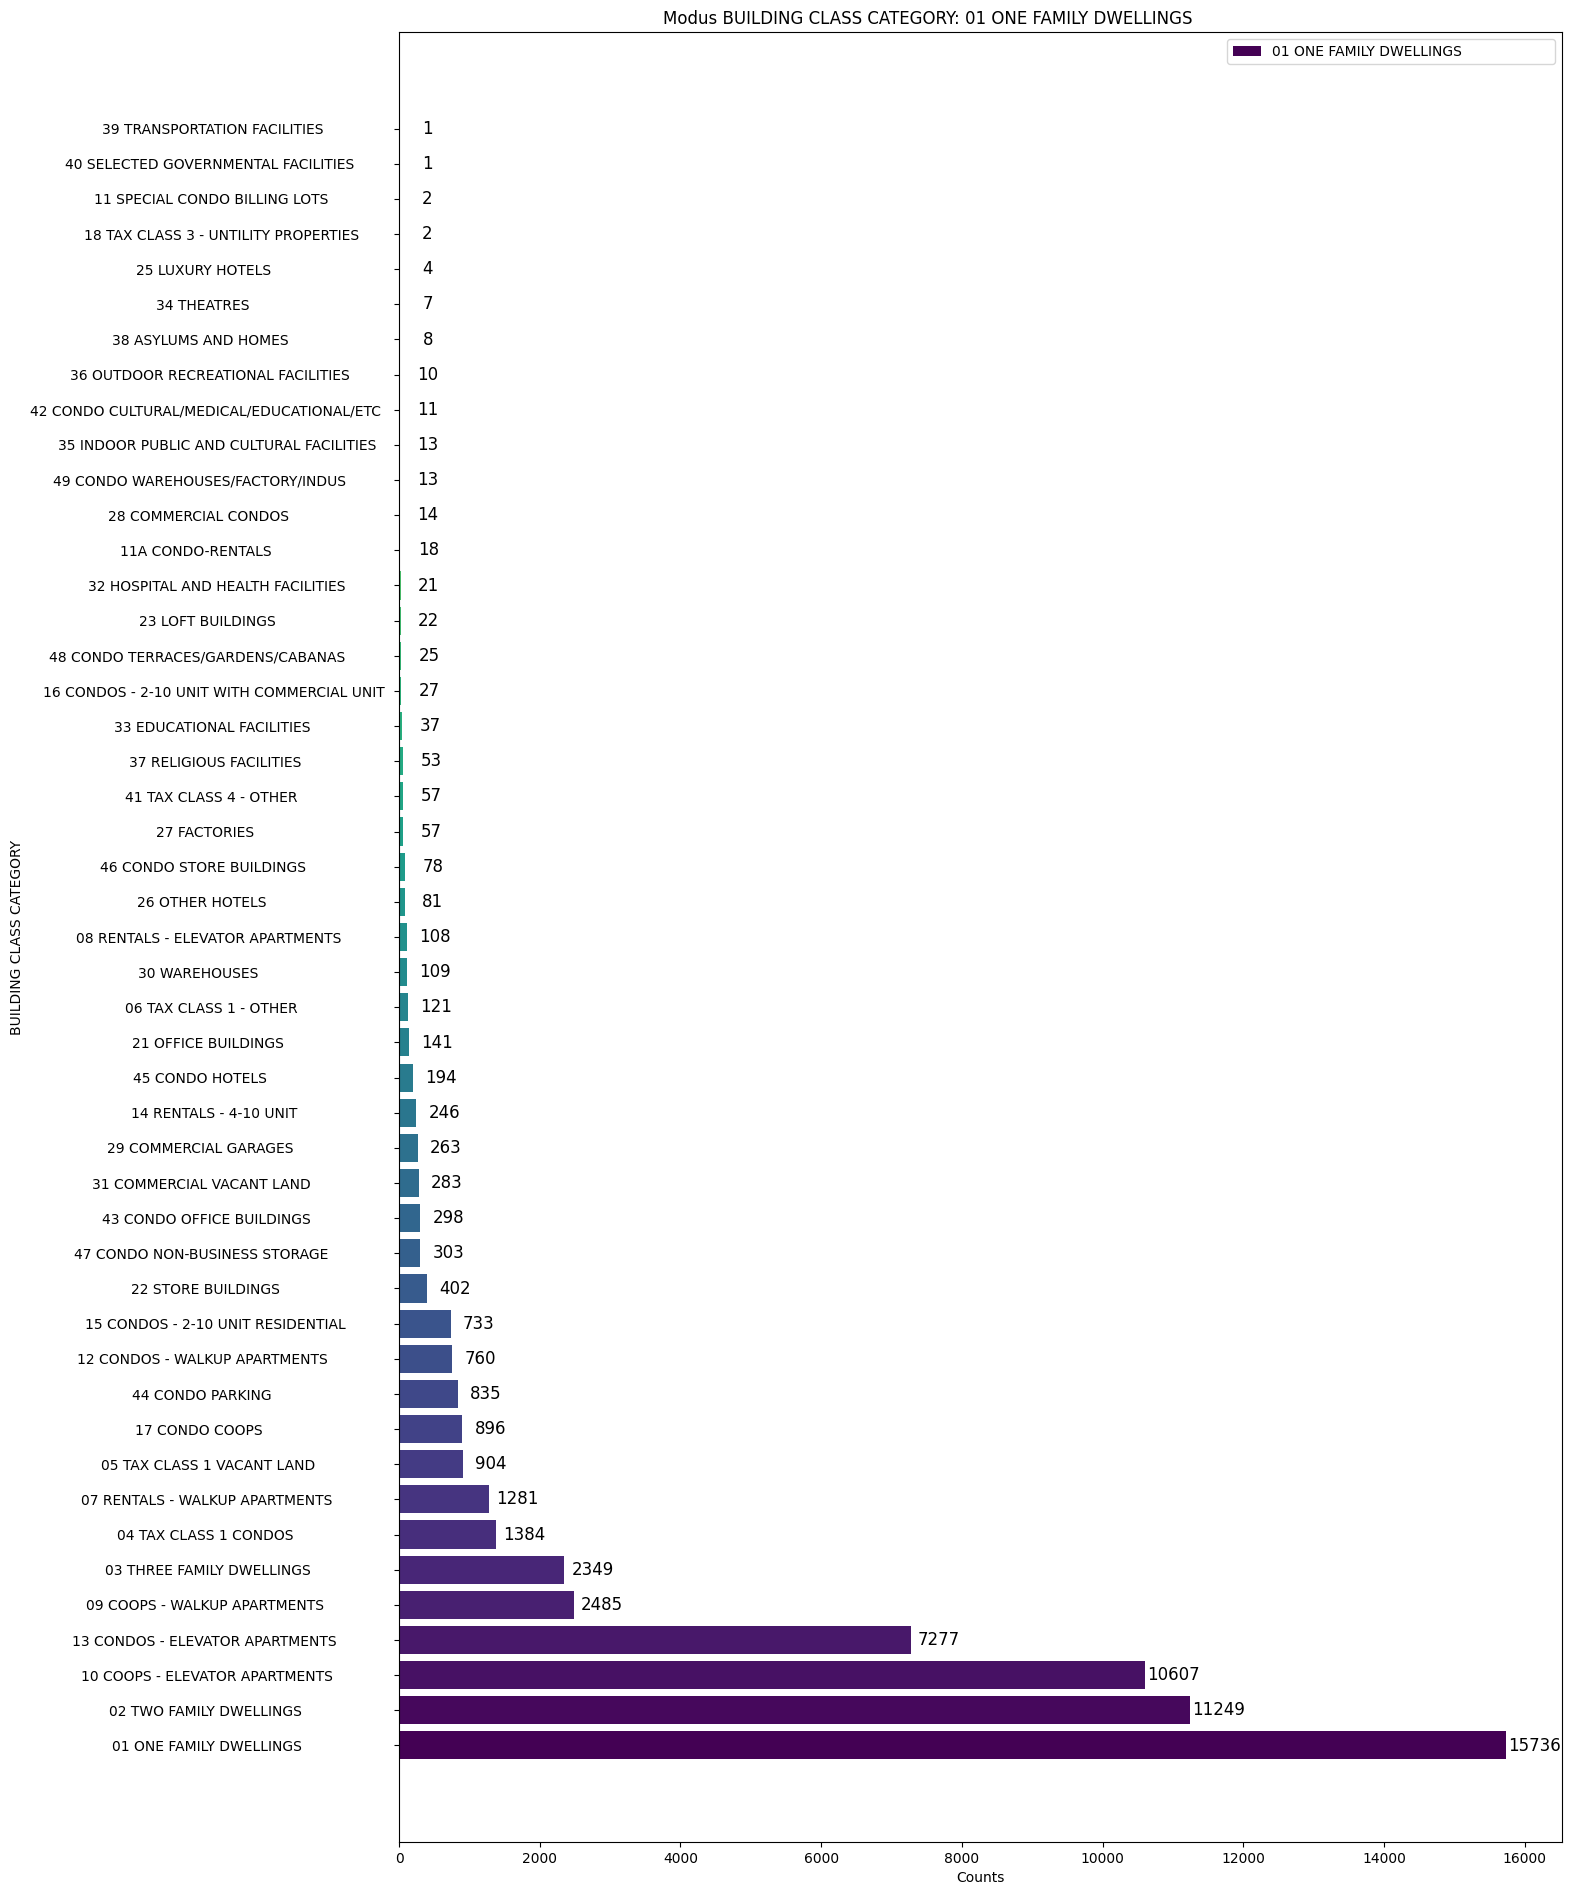

In [35]:
# Create a horizontal bar plot with different colors
colors = plt.cm.viridis(np.linspace(0, 1, len(building_class_counts_df)))
bars = plt.barh(building_class_counts_df['BUILDING CLASS CATEGORY'], building_class_counts_df['Counts'], color=colors)

# Add values at the end of each bar
for bar, value in zip(bars, building_class_counts_df['Counts']):
    plt.text(bar.get_width() + 400, bar.get_y() + bar.get_height()/2, f'{value}', ha='center', va='center', fontsize=12)

# Add title and labels
plt.title(f"Modus BUILDING CLASS CATEGORY: {mode_building_class}")
plt.xlabel('Counts')
plt.ylabel('BUILDING CLASS CATEGORY')

# Set the width and height of the graph
plt.gcf().set_size_inches(15, len(building_class_counts_df) * 0.5)

# Add a legend
plt.legend(building_class_counts_df['BUILDING CLASS CATEGORY'], loc='upper right')

# Show the plot
plt.show()

**Conclusion:** In the above syntax, the mode of the building class category ('BUILDING CLASS CATEGORY') in the real estate sales data is calculated, resulting in the most frequently occurring building class category. Subsequently, the frequency of each building class category is calculated and presented in the form of a data table and a horizontal bar chart that visualizes the distribution of the frequency of each building class category. Based on the graph above, it can be concluded that the `most popular building class category is 01 ONE FAMILY DWELLINGS with a count of 1,573`.

## Range
Range is a statistical term that refers to the difference between the maximum and minimum values in a dataset.

**Range untuk Residential Units, Commercial Units, Total Units, Land Square Feet, Gross Square Feet, dan Sale Price for each borough**

In [36]:
# Range for Resedential Units
min_max_residential = new_df.groupby(['BOROUGH'], observed=False)['RESIDENTIAL UNITS'].agg(['min', 'max', lambda x: x.max() - x.min()]).reset_index()
min_max_residential.columns = ['BOROUGH', 'Minimum', 'Maximum', 'Range']
print(min_max_residential)

#Overall Range
min_residential_units = df['RESIDENTIAL UNITS'].min()
max_residential_units = df['RESIDENTIAL UNITS'].max()
print("Overall Range for RESIDENTIAL UNITS:", min_residential_units, "-", max_residential_units)

         BOROUGH  Minimum  Maximum  Range
0      Manhattan        0     1641   1641
1          Bronx        0      462    462
2       Brooklyn        0      324    324
3         Queens        0     1844   1844
4  Staten Island        0      143    143
Overall Range for RESIDENTIAL UNITS: 0 - 1844


In [37]:
# Range for Commercial Units
min_max_commercial = new_df.groupby(['BOROUGH'], observed=False)['COMMERCIAL UNITS'].agg(['min', 'max', lambda x: x.max() - x.min()]).reset_index()
min_max_commercial.columns = ['BOROUGH', 'Minimum', 'Maximum', 'Range']
print(min_max_commercial)

#Overall Range
min_commercial_units = df['COMMERCIAL UNITS'].min()
max_commercial_units = df['COMMERCIAL UNITS'].max()
print("Overall Range for COMMERCIAL UNITS:", min_commercial_units, "-", max_commercial_units)

         BOROUGH  Minimum  Maximum  Range
0      Manhattan        0      422    422
1          Bronx        0        7      7
2       Brooklyn        0       14     14
3         Queens        0     2261   2261
4  Staten Island        0      126    126
Overall Range for COMMERCIAL UNITS: 0 - 2261


In [38]:
# Range for Total Units
min_max_totalunits = new_df.groupby(['BOROUGH'], observed=False)['TOTAL UNITS'].agg(['min', 'max', lambda x: x.max() - x.min()]).reset_index()
min_max_totalunits.columns = ['BOROUGH', 'Minimum', 'Maximum', 'Range']
print(min_max_totalunits)

#Overall Range
min_total_units = df['TOTAL UNITS'].min()
max_total_units = df['TOTAL UNITS'].max()
print("Overall Range for TOTAL UNITS:", min_total_units, "-", max_total_units)

         BOROUGH  Minimum  Maximum  Range
0      Manhattan        0     1653   1653
1          Bronx        0      462    462
2       Brooklyn        0      324    324
3         Queens        0     2261   2261
4  Staten Island        0      143    143
Overall Range for TOTAL UNITS: 0 - 2261


In [39]:
# Range for Land Square Feet
min_max_land = new_df.groupby(['BOROUGH'], observed=False)['LAND SQUARE FEET'].agg(['min', 'max', lambda x: x.max() - x.min()]).reset_index()
min_max_land.columns = ['BOROUGH', 'Minimum', 'Maximum', 'Range']
print(min_max_land)

#Overall Range
min_land_square = df['LAND SQUARE FEET'].min()
max_land_square = df['LAND SQUARE FEET'].max()
print("Overall Range for LAND SQUARE FEET:", min_land_square, "-", max_land_square)

         BOROUGH  Minimum    Maximum      Range
0      Manhattan     88.0   364000.0   363912.0
1          Bronx      0.0   340000.0   340000.0
2       Brooklyn      0.0   970000.0   970000.0
3         Queens      7.0  4228300.0  4228293.0
4  Staten Island    102.0  2128899.0  2128797.0
Overall Range for LAND SQUARE FEET: 0.0 - 4252327.0


In [40]:
# Range for Gross Square Feet
min_max_gross = new_df.groupby(['BOROUGH'], observed=False)['GROSS SQUARE FEET'].agg(['min', 'max', lambda x: x.max() - x.min()]).reset_index()
min_max_gross.columns = ['BOROUGH', 'Minimum', 'Maximum', 'Range']
print(min_max_gross)

#Overall Range
min_gross_square = df['GROSS SQUARE FEET'].min()
max_gross_square = df['GROSS SQUARE FEET'].max()
print("Overall Range for GROSS SQUARE FEET:", min_gross_square, "-", max_gross_square)

         BOROUGH  Minimum    Maximum      Range
0      Manhattan    225.0  2155492.0  2155267.0
1          Bronx      0.0   395000.0   395000.0
2       Brooklyn      0.0   457966.0   457966.0
3         Queens    200.0  3750565.0  3750365.0
4  Staten Island    200.0   683200.0   683000.0
Overall Range for GROSS SQUARE FEET: 0.0 - 3750565.0


In [41]:
# Range for Sale Price
min_max_saleprice = new_df.groupby(['BOROUGH'], observed=False)['SALE PRICE'].agg(['min', 'max', lambda x: x.max() - x.min()]).reset_index()
min_max_saleprice.columns = ['BOROUGH', 'Minimum', 'Maximum', 'Range']
print(min_max_saleprice)

#Overall Range
min_saleprice = new_df['SALE PRICE'].min()
max_saleprice = new_df['SALE PRICE'].max()
print("Overall Range for SALE PRICE:", min_saleprice, "-", max_saleprice)

         BOROUGH  Minimum    Maximum      Range
0      Manhattan      1.0  1082500.0  1082499.0
1          Bronx      1.0  1081762.0  1081761.0
2       Brooklyn      1.0  1080000.0  1079999.0
3         Queens      1.0  1082399.0  1082398.0
4  Staten Island      1.0  1075000.0  1074999.0
Overall Range for SALE PRICE: 1.0 - 1082500.0


## Variance
Variance is a statistical measure that quantifies the degree of spread or dispersion in a set of data points.

**The variance difference for Residential Units dan Commercial Units**

In [42]:
# Calculate variance
var_residential = new_df['RESIDENTIAL UNITS'].var()
var_commercial = new_df['COMMERCIAL UNITS'].var()
var_total = new_df['TOTAL UNITS'].var()

# Display variance
print("Variance for RESIDENTIAL UNITS:", var_residential)
print("Variance for COMMERCIAL UNITS:", var_commercial)
print("Difference for RESIDENTIAL and COMMERCIAL UNITS:", var_residential - var_commercial)
print("Variance for TOTAL UNITS:", var_total)

Variance for RESIDENTIAL UNITS: 232.29635252366631
Variance for COMMERCIAL UNITS: 96.19077407659954
Difference for RESIDENTIAL and COMMERCIAL UNITS: 136.10557844706676
Variance for TOTAL UNITS: 332.30823183479447


**Conclusion:** Variance is a measure of how far the data in each type of unit deviates from the mean. A larger variance indicates that the data has more significant variability or is more dispersed from the mean. Based on the results above, it can be concluded that `residential units (232.296) have a higher variance compared to commercial units (96.191)` with a difference of 136.105.

## Standard Deviation
Standard Deviation is a statistical measure that quantifies the amount of variation or dispersion in a set of data points.

**The standard deviation difference for Land Square Feet and Gross Square Feet**

In [43]:
# Calculate StdDev
stddev_land = new_df['LAND SQUARE FEET'].std()
stddev_gross = new_df['GROSS SQUARE FEET'].std()

# Display StdDev
print("Standard Deviation for LAND SQUARE FEET:", stddev_land)
print("Standard Deviation for GROSS SQUARE FEET:", stddev_gross)
print("Difference for LAND and GROSS SQUARE FEET:", stddev_land - stddev_gross)

Standard Deviation for LAND SQUARE FEET: 30135.353110429543
Standard Deviation for GROSS SQUARE FEET: 27877.87259681166
Difference for LAND and GROSS SQUARE FEET: 2257.480513617884


**Conclusion:** A larger standard deviation indicates that the data has more significant variability or is more dispersed from the mean. The difference between the standard deviation of LAND SQUARE FEET and GROSS SQUARE FEET indicates the extent to which the spread of land area (LAND SQUARE FEET) differs from the spread of gross building area (GROSS SQUARE FEET) in the dataset. Based on the results above, it can be concluded that `land square feet (30135.353) have a higher StDev compared to gross square feet (27877.873)` with a difference of 2257.480.

# **Confidence Intervals and Probability Distribution**
<hr>

In [44]:
sort_df = nyc[nyc["YEAR"] == 2017].sort_values("MEAN",ascending=False).head(5)
sort_df

,BOROUGH,BUILDING CLASS AT PRESENT,YEAR,MEAN,MEDIAN,MODE,RANGE,VARIANCE,STANDARD DEVIATION
109,Brooklyn,E,2017,723714.285714,980000.0,1000000.0,1049000.0,1.568816e+11,396082.783555
79,Bronx,O,2017,716351.200000,750000.0,450000.0,560000.0,6.992729e+10,264437.683977
25,Manhattan,M,2017,628809.428571,530000.0,530000.0,670000.0,4.882655e+10,220967.295217
75,Bronx,M,2017,625000.000000,625000.0,700000.0,150000.0,1.125000e+10,106066.017178
35,Manhattan,R,2017,622876.775216,530000.0,530000.0,1082499.0,4.303632e+10,207451.973816


In [45]:
temp = []
for i,j,k in zip(sort_df["BOROUGH"],sort_df["BUILDING CLASS AT PRESENT"],sort_df["YEAR"]):
    temp.append(new_df[(new_df["BOROUGH"] == i) &
                       (new_df["BUILDING CLASS AT PRESENT"] == j) &
                       (new_df["YEAR"] == k)])
    
saleprice = np.array(pd.concat(temp)["SALE PRICE"])
saleprice

array([5.8500e+05, 1.0000e+03, 1.0500e+06, ..., 5.6000e+05, 4.7500e+05,
       4.0053e+05])

In [46]:
np.random.seed(807)
sample_means = []
n = 30
for sample in range(0,500):
    sample_values = np.random.choice(a = saleprice, size = n)
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)

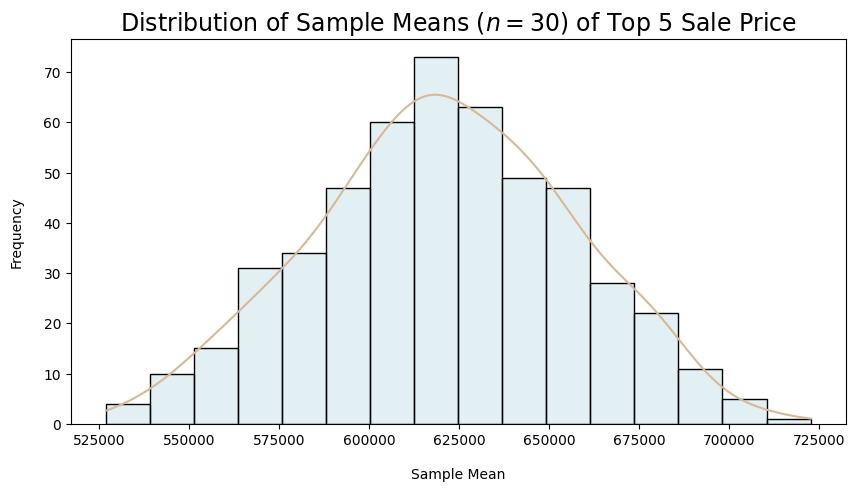

In [47]:
plt.figure(figsize=(10,5),dpi=100)
ax = sns.histplot(data=sample_means,kde=True,color="#C6E2E9")
ax.lines[0].set_color("#DAB894")
plt.title("Distribution of Sample Means ($n=30$) of Top 5 Sale Price", fontsize=17)
plt.xlabel("Sample Mean", labelpad=14)
plt.ylabel("Frequency", labelpad=14);
plt.show()

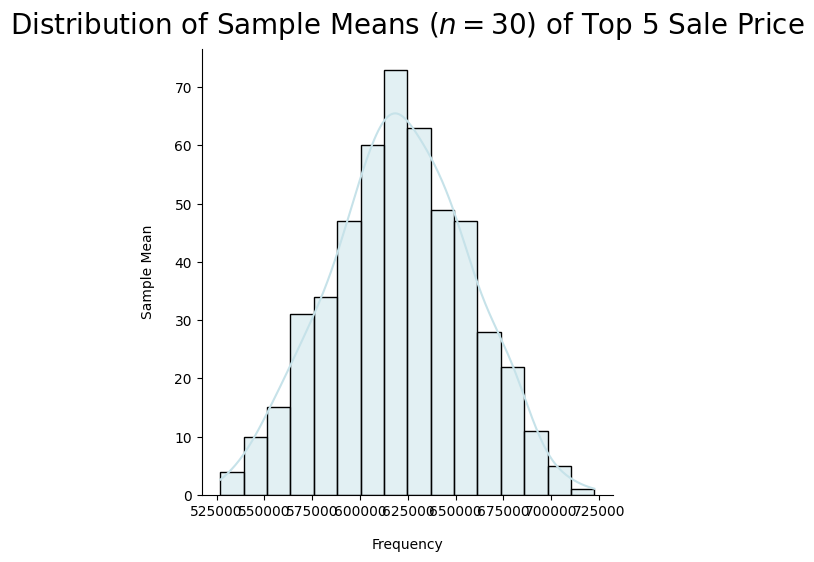

In [48]:
# Or View Distribution using this way
sns.displot(sample_means, color="#C6E2E9", kde=True)
plt.xlabel("Frequency", labelpad=14)
plt.ylabel("Sample Mean", labelpad=14)
plt.title("Distribution of Sample Means ($n=30$) of Top 5 Sale Price", y=1.015, fontsize=20);

In [49]:
# Calculate Median of Sample Means
median_of_sample_means = np.median(sample_means)
print(median_of_sample_means)

# Calculate Mean of Sample Means
mean_of_sample_means = np.mean(sample_means)
print(mean_of_sample_means)

# Calculate Standard Deviation of Sample Means
stdev_of_sample_means = np.std(sample_means)
print(stdev_of_sample_means)

620712.2333333334
620792.5181999999
35790.996212590675


In [50]:
# Calculate Standard Deviation
std_dev = saleprice.std()
print(std_dev)

standard_error = std_dev/np.sqrt(n)
print(standard_error)

207982.59348948096
37972.25267420527


In [51]:
tail = 1 - stats.norm.cdf(1.96)
tail

0.024997895148220484

In [52]:
1 - (tail * 2)

0.950004209703559

In [53]:
lower = mean_of_sample_means - 1.96*standard_error
print(lower)

upper = mean_of_sample_means + 1.96*standard_error
print(upper)

546366.9029585576
695218.1334414423


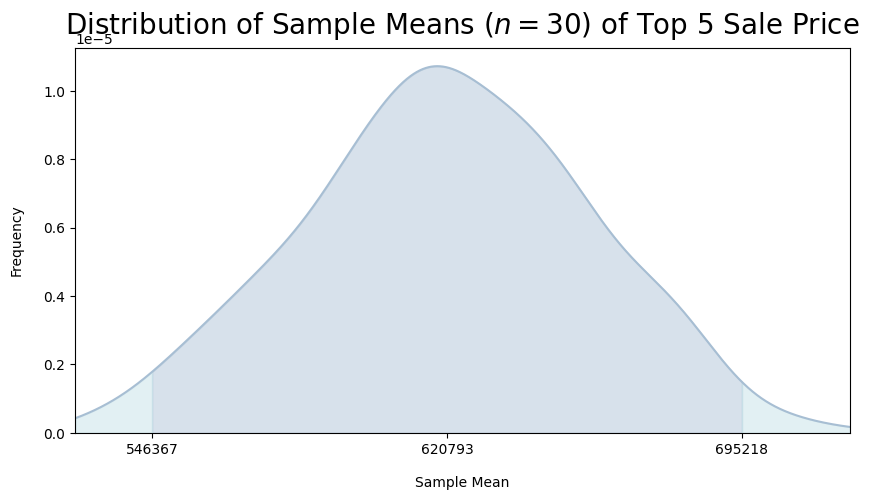

In [54]:
plt.figure(figsize=(10,5),dpi=100)
kde = stats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means), np.max(sample_means), 10000)
plt.plot(pos, kde(pos), color='#A7BED3')
shade = np.linspace(lower, upper, 300)

plt.fill_between(shade, kde(shade), alpha=0.45, color='#A7BED3')
plt.xticks([lower,mean_of_sample_means,upper])
plt.xlim(xmin=np.min(sample_means),xmax=np.max(sample_means))
plt.ylim(ymin=0)

left = np.linspace(np.min(sample_means),lower,10000)
right = np.linspace(upper,np.max(sample_means),10000)
for i in [left,right]:
    plt.fill_between(i,kde(i),color="#C6E2E9",alpha=0.5)

plt.title("Distribution of Sample Means ($n=30$) of Top 5 Sale Price", y=1.015, fontsize=20)
plt.xlabel("Sample Mean", labelpad=14)
plt.ylabel("Frequency", labelpad=14)

plt.show()

**Conclusion:** Based on the graph, it can be concluded that there is a 95% probability that the mean of a sample with n=30 will fall within the darker blue shaded area. Therefore, the probability that the mean of a sample with n=30 will be outside the darker blue shaded area is 100% - 95%.

# **Hypothesis Testing**
<hr>

### Hypothesis
- $H_{0}$: data is normally distributed
- $H_{1}$: data is not normally distributed

### Significance Level
$\alpha = 5\%$

### Test Statistics

In [55]:
nyc_1 = nyc[nyc["YEAR"] == 2017].sort_values("MEAN",ascending=False).head(1)
nyc_1

,BOROUGH,BUILDING CLASS AT PRESENT,YEAR,MEAN,MEDIAN,MODE,RANGE,VARIANCE,STANDARD DEVIATION
109,Brooklyn,E,2017,723714.285714,980000.0,1000000.0,1049000.0,1.568816e+11,396082.783555


In [56]:
nyc_1sp = np.array(new_df[(new_df["BOROUGH"]==nyc_1["BOROUGH"].iloc[0]) &
                          (new_df["BUILDING CLASS AT PRESENT"]==nyc_1["BUILDING CLASS AT PRESENT"].iloc[0]) &
                          (new_df["YEAR"]==nyc_1["YEAR"].iloc[0])]["SALE PRICE"])
nyc_1sp

array([5.85e+05, 1.00e+03, 1.05e+06, 9.80e+05, 4.50e+05, 1.00e+06,
       1.00e+06])

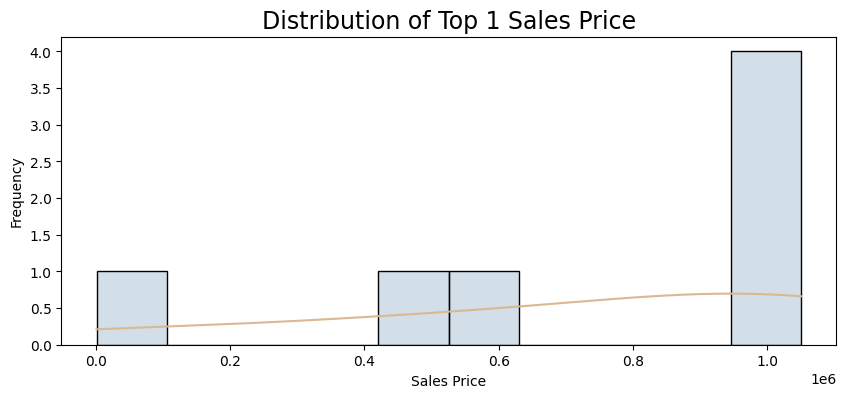

,Kolmogorov-Smirnov,Prob. (K-S),Reject H0 (K-S),Shapiro-Wilk,Prob. (S-W),Reject H0 (S-W)
,0.312629,0.037331,Reject,0.820586,0.065056,Fail to Reject


In [57]:
plt.figure(figsize=(10,4), dpi=100)
ax = sns.histplot(data=nyc_1sp,bins=10,kde=True, color="#A7BED3")
ax.lines[0].set_color("#DAB894")
plt.xlabel("Sales Price")
plt.ylabel("Frequency")
plt.title("Distribution of Top 1 Sales Price", fontsize=17)

plt.show()

ks_stat,ks_pval = lilliefors(nyc_1sp,dist="norm",pvalmethod="approx")
sw_stat,sw_pval = shapiro(nyc_1sp)
ks_reject = "Reject" if ks_pval < 0.05 else "Fail to Reject"
sw_reject = "Reject" if sw_pval < 0.05 else "Fail to Reject"

pd.DataFrame({
    "Kolmogorov-Smirnov": [ks_stat],
    "Prob. (K-S)": [ks_pval],
    "Reject H0 (K-S)": [ks_reject],
    "Shapiro-Wilk": [sw_stat],
    "Prob. (S-W)": [sw_pval],
    "Reject H0 (S-W)": [sw_reject]
}, index=[""])

**Conclusion:** Based on the output above,the probability of Kolmogorov-Smirnov = 0,037 < α = 0,05 and the probability of Shapiro-Wilk = 0,065 > α = 0,05 so that `it can be concluded that the data are not normally distributed`. Therefore, the assumption of normality visually and formally has not been fulfilled, so it needs to be followed up by performing the `transformation`. 

**Power transformation** is a statistical method that involves raising the values in a variable to a specific exponent. This transformation is used to alter the distribution of data to be closer to a normal distribution or to reduce variability among values. The general form of the power transformation is $Y=X^p$, where $X$ is the original value of the variable, $Y$ is the transformed value, and $p$ is the exponent.

The provided syntax utilizes the NumPy function np.power to carry out a power transformation on the variable nyc_1sp. This type of transformation involves raising each individual data point in the array nyc_1sp to the power specified by the custom_exponent. In this case, the custom_exponent is set to 5, implying that each data point will be raised to the fifth power.

In [58]:
custom_exponent = 5  # You can adjust this exponent as needed
transform = np.power(nyc_1sp, custom_exponent)

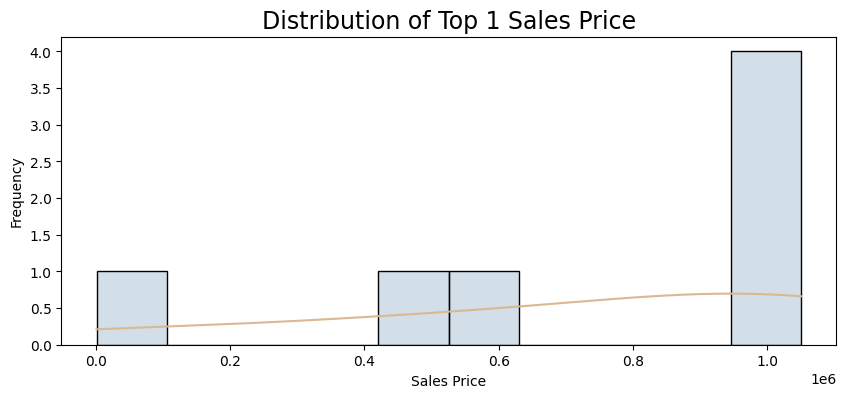

,Kolmogorov-Smirnov,Prob. (K-S),Reject H0 (K-S),Shapiro-Wilk,Prob. (S-W),Reject H0 (S-W)
,0.273402,0.127371,Fail to Reject,0.810126,0.051514,Fail to Reject


In [59]:
plt.figure(figsize=(10,4), dpi=100)
ax = sns.histplot(data=nyc_1sp,bins=10,kde=True, color="#A7BED3")
ax.lines[0].set_color("#DAB894")
plt.xlabel("Sales Price")
plt.ylabel("Frequency")
plt.title("Distribution of Top 1 Sales Price", fontsize=17)

plt.show()

ks_stat,ks_pval = lilliefors(transform,dist="norm",pvalmethod="approx")
sw_stat,sw_pval = shapiro(transform)
ks_reject = "Reject" if ks_pval < 0.05 else "Fail to Reject"
sw_reject = "Reject" if sw_pval < 0.05 else "Fail to Reject"

pd.DataFrame({
    "Kolmogorov-Smirnov": [ks_stat],
    "Prob. (K-S)": [ks_pval],
    "Reject H0 (K-S)": [ks_reject],
    "Shapiro-Wilk": [sw_stat],
    "Prob. (S-W)": [sw_pval],
    "Reject H0 (S-W)": [sw_reject]
}, index=[""])

### Coclusion
Based on the output above, it can be seen visually that the distribution is approximately symmetric, so it seems it's normally distributed. Then formally, the probability of Kolmogorov-Smirnov = 0,127 > α = 0,05 and the probability of Shapiro-Wilk = 0,56 > α = 0,05. So that `it can be concluded that the data are normally distributed. Therefore, the assumption of normality visually and formally fulfilled`.